# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Google Trends ให้เราประมาณการปริมาณการค้นหา เรามาสำรวจว่าความนิยมในการค้นหาเกี่ยวข้องกับข้อมูลประเภทอื่น ๆ บางอย่างบ้างหรือไม่ บางทีอาจมีรูปแบบในปริมาณการค้นหาของ Google และราคาของบิตคอยน์หรือหุ้นเช่น Tesla บางทีปริมาณการค้นหาสำหรับคำว่า "สวัสดิการอายุ" สามารถบอกให้เราทราบบางสิ่งเกี่ยวกับอัตราการว่างงานจริงได้หรือไม่?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

ดาวน์โหลดและเพิ่มไฟล์ .csv ไปยังโฟลเดอร์เดียวกับ Notebook ของคุณ

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>


**Challenge**: <br>
<ul>
<li>shape ของ dataframe คืออะไร</li>
<li>จำนวน rows และ colunms คือเท่าไร</li>
<li>ชื่อ columns มีอะไรบ้าง? </li>
<li>กรุณาเติม f-string เพื่อแสดงตัวเลขที่มากที่สุด/น้อยที่สุดในคอลัมน์ข้อมูลการค้นหา</li> 
<li>ลองใช้ <code>.describe()</code> function เพื่อดูข้อมูลที่มีประโยชน์ด้านสถิติ</li>
<li>ความถี่ของข้อมูลชุดเวลาเป็นระยะ (รายวัน, รายสัปดาห์, รายเดือน) คืออะไร? </li>
<li>ค่า 100 ในความนิยมการค้นหาของ Google แท้จริงหมายความว่าอย่างไร?</li>
</ul>

In [3]:
print(df_tesla.shape)
df_tesla.head()

(124, 3)


MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368

In [26]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [27]:
df_tesla.describe()

TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007

### Unemployment Data

In [28]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6

In [29]:
print(f"Largest value for 'Unemployment Benefits' : in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}")

Largest value for 'Unemployment Benefits' : in Web Search: 100


### Bitcoin

In [30]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0

In [31]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5

In [32]:
print(f'largest BTC News Search {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

**Challenge**: มีค่าที่หายไปใน dataframe ใดบ้างหรือไม่? ถ้ามี, แถว/แถวไหนที่มีค่าที่หายไป? มีค่าที่หายไปกี่ค่า?

In [33]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')


Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [34]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [35]:
df_btc_price[df_btc_price.isna()]

DATE  CLOSE  VOLUME
0     NaN    NaN     NaN
1     NaN    NaN     NaN
2     NaN    NaN     NaN
3     NaN    NaN     NaN
4     NaN    NaN     NaN
...   ...    ...     ...
2199  NaN    NaN     NaN
2200  NaN    NaN     NaN
2201  NaN    NaN     NaN
2202  NaN    NaN     NaN
2203  NaN    NaN     NaN

[2204 rows x 3 columns]

**Challenge**: Remove any missing values that you found. 

**Challenge**: ลบค่าที่หายไปที่คุณพบ

In [36]:
# df_btc_price = df_btc_price.dropna()
df_btc_price.dropna(inplace=True)

print(f'Missing values for BTC price?: {df_btc_price.isna().values.sum()}')
df_btc_price[df_btc_price.CLOSE.isna()]



Missing values for BTC price?: 0


Empty DataFrame
Columns: [DATE, CLOSE, VOLUME]
Index: []

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.


**Challenge**: ตรวจสอบประเภทข้อมูลในคอลัมน์ MONTH หรือ DATE ของ DataFrame และแปลงข้อมูลประเภท String เป็น Object Datetime ทำเช่นนี้สำหรับ DataFrame ทั้ง 4 ตัว ตรวจสอบว่าการแปลงประเภทข้อมูลเป็นสำเร็จหรือไม่เป็นอย่างดี

In [37]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [38]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [4]:
df_btc_price

DATE         CLOSE        VOLUME
0     2014-09-17    457.334015  2.105680e+07
1     2014-09-18    424.440002  3.448320e+07
2     2014-09-19    394.795990  3.791970e+07
3     2014-09-20    408.903992  3.686360e+07
4     2014-09-21    398.821014  2.658010e+07
...          ...           ...           ...
2199  2020-09-24  10745.548828  2.301754e+10
2200  2020-09-25  10702.290039  2.123255e+10
2201  2020-09-26  10754.437500  1.810501e+10
2202  2020-09-27  10774.426758  1.801688e+10
2203  2020-09-28  10912.536133  2.122653e+10

[2204 rows x 3 columns]

In [39]:
df_btc_monthly = df_btc_price.resample(rule='M', on='DATE').last()

print(df_btc_monthly.shape)
print(df_btc_price.head())
print(df_btc_monthly.head())

(73, 2)
        DATE       CLOSE      VOLUME
0 2014-09-17  457.334015  21056800.0
1 2014-09-18  424.440002  34483200.0
2 2014-09-19  394.795990  37919700.0
3 2014-09-20  408.903992  36863600.0
4 2014-09-21  398.821014  26580100.0
                 CLOSE      VOLUME
DATE                              
2014-09-30  386.944000  34707300.0
2014-10-31  338.321014  12545400.0
2014-11-30  378.046997   9194440.0
2014-12-31  320.192993  13942900.0
2015-01-31  217.464005  23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [40]:
# Create locators for ticks on the time axis

In [41]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 


**Challenge:** Plot Tesla stock price ต่อ Tesla search volume  โดยใช้กราฟเส้นและแกนสองแกนที่แตกต่างกัน ตั้งชื่อแกนหนึ่งว่า 'TSLA Stock Price' และอีกแกนหนึ่งว่า 'Search Trend'

In [42]:
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E') # can use a HEX code
ax2.set_ylabel('Search Trend', color='skyblue') # or a named colour
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  


**Challenge**: เพิ่มสีเพื่อสร้างสไตล์ให้แกนที่ออกแบบ นี้จะช่วยแยกแยะระหว่างเส้นสองเส้นและป้ายชื่อแกนได้ ลองใช้สีน้ำเงินหนึ่งในสี [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) สำหรับปริมาณการค้นหาให้ใช้สีน้ำเงินและสำหรับราคาหุ้นให้ใช้รหัส HEX สีแดง
<br>
<br>
Hint: คุณสามารถใส่สีให้ทั้งสอง [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) และ [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) บน chart ใช้ keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.


**Challenge**: ทำให้แผนภูมิใหญ่ขึ้นและอ่านง่ายขึ้นครับ.
1. เพิ่ม figure size (e.g., to 14 by 8). 
2. เพิ่ม font sizes สำหรับ labels และ the ticks บร x-axis เป็น 14
3. Rotate ข้อความบน x-axis ที่ 45 องศา. 
4. ทำให้ lines บน chart หนาขึ้น
5. เพิ่ม title ว่า 'Tesla Web Search vs Price'
6. รักษาความคมชัดของแผนภูมิโดยการเปลี่ยนแปลง dots-per-inch หรือ [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. ตั้งค่าค่าต่ำสุดและค่าสูงสุดสำหรับแกน y และแกน x ใช้คำแนะนำ: ตรวจสอบวิธีการเช่น [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. สุดท้ายใช้ [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) เพื่อแสดงแผนภูมิใต้ cell แทนการพึ่งพาผลลัพธ์ Notebook อัตโนมัติ

In [43]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Tesla Web Search vs Price', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
 
plt.show()

How to add tick formatting for dates on the x-axis. 

การเพิ่มรูปแบบของ tick สำหรับ วันที่ บน x-axis

In [44]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?


**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. ปรับ title เป็น 'Bitcoin News Search vs Resampled Price' <br>
2. เปลี่ยน y-axis label เป็น 'BTC Price' <br>
3. เปลี่ยน y- และ x-axis ขอบเขตเพื่อปรับปรุงการแสดงผล <br>
4. สำรวจ [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) พื่อทำให้ราคา Bitcoin เป็นเส้นประ (dashed line) <br>
5. สำรวจ [marker types](https://matplotlib.org/3.2.1/api/markers_api.html)
เพื่อทำให้ข้อมูลการค้นหาเป็นจุดวงกลมเล็ก ๆ <br>
6. การเพิ่มขึ้นของการค้นหาในกรณีของ Bitcoin มักเกิดพร้อมกับการเพิ่มขึ้นของราคามั้ย?

In [45]:
plt.figure(figsize=(14,8), dpi=120)
 
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
 
# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. เปลี่ยน title เป็น Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. เปลี่ยน y-axis label เป็น FRED U/E Rate <br>
3. เปลี่ยน axis limits <br>
4. เพิ่มเส้นตารางสีเทา [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html)เพื่อดูปีและค่าอัตราการว่างงานได้ดีขึ้น ใช้เส้นประ (dashes) สำหรับ line style<br> 
5. คุณสามารถสังเกตรูปแบบฤดูกาลในการค้นหาได้หรือไม่? มีรูปแบบอะไรบ้าง?

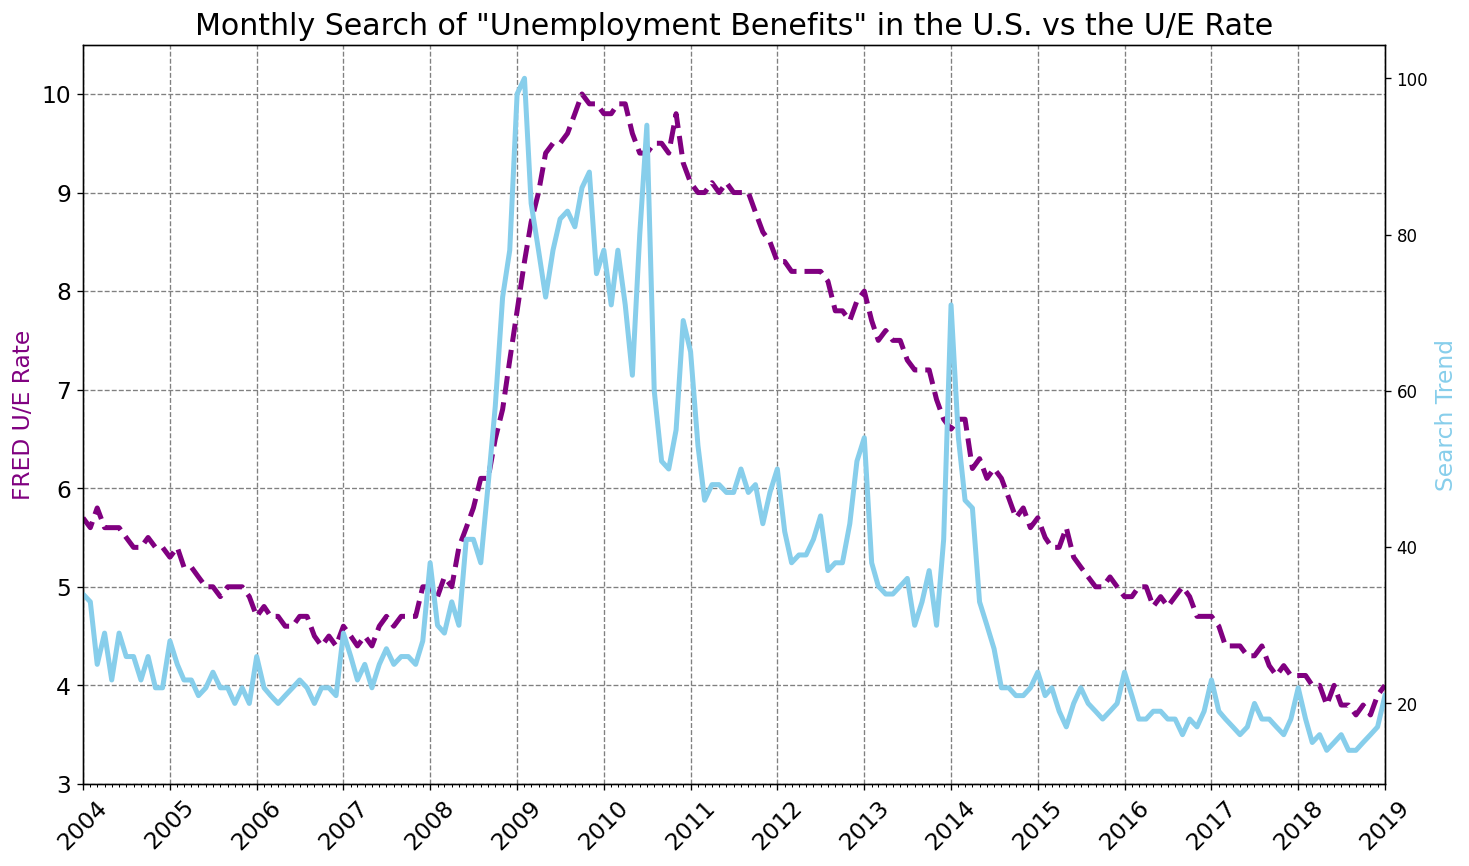

In [46]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
# Show the grid lines as dark grey lines
ax1.grid(color='grey', linestyle='--')
 
# Change the dataset used
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, 
         color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, 
         color='skyblue', linewidth=3)
 
plt.show()


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?

**Challenge**: คำนวณ 3 เดือนและ 6 เดือน rolling average สำหรับการค้นหาบน Web ทำการ Plot 6 เดือน rolling average ของการค้นหาข้อมูล กับ unemployment จริง คุณเห็นอะไรในแผนภูมิ? เส้นไหนเคลื่อนที่ก่อน?

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

**Challenge**: อ่านข้อมูลใน 'UE Benefits Search vs UE Rate 2004-20.csv' เข้าสู่ DataFrame และแปลงคอลัมน์ MONTH เป็นอ็อบเจกต์ Pandas Datetime จากนั้นพล็อตแผนภูมิ คุณเห็นอะไร?

In [47]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

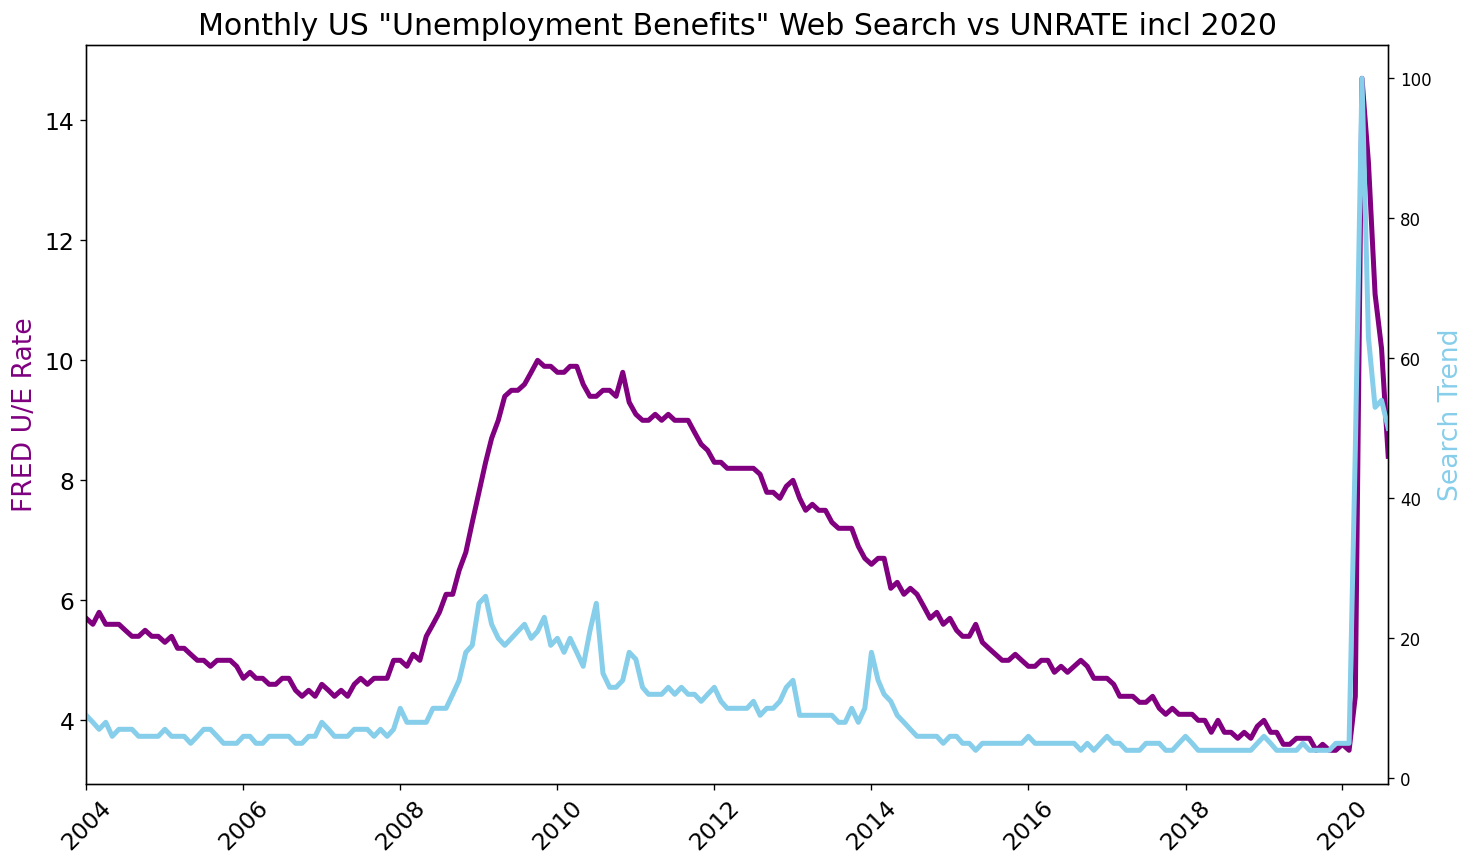

In [48]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()